### 생선의 길이를 사용하여 무게를 예측

In [1]:
import numpy as np

In [3]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [4]:
import matplotlib.pyplot as plt

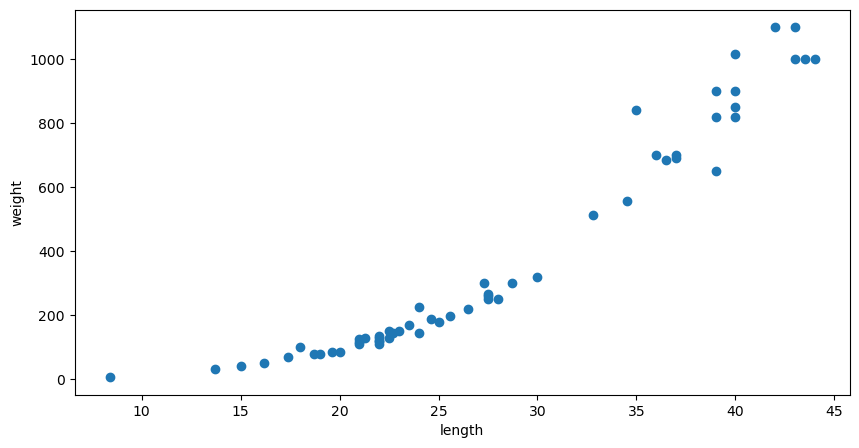

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(
    fish_length,
    fish_weight
)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Train Set과 Test Set 분리


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length,
    fish_weight,
    random_state=42
)

> kNN 분류에 사용되었던 stratify는 분류 문제가 아니므로 사용하지 않는다.

In [10]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42,) (14,)
(42,) (14,)


In [11]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [12]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1, 1) # -1: NumPy에게 해당 차원의 크기를 자동으로 계산하도록 지시
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


In [14]:
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

### 회귀 모델 사용

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [18]:
knr.score(test_input, test_target)

0.992809406101064

> 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음

#### 결정계수(R^2) : 평균 제곱 오차   
: Mean Squared Error: 1 - ((Targe - Pred)^2의 합 / (Target - 평균)^2의 합)

In [20]:
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

In [21]:
# 테스트 세트에 대한 예측
pred = knr.predict(test_input)
pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [23]:
# 테스트세트에 대한 평균 절대값 오차 : 표준오차
mae = mean_absolute_error(test_target, pred)
mae

19.157142857142862

### 과대적합(Overfitting)과 과소적합(underfitting)

In [24]:
# train data로 score 측정
knr.score(train_input, train_target)

0.9698823289099254

In [25]:
# test data로 score 측정
knr.score(test_input, test_target)

0.992809406101064

> train보다 test의 점수가 더 잘나왔을 경우를 과소적합이라 한다.  
보통은 train의 점수가 test의 점수보다 조금 더 잘 나온 과대적합을 기준으로 한다.

knn의 Hyper Parameter를 조절

In [26]:
# 이웃의 갯수가 default는 5 -> 3으로 조절
knr.n_neighbors = 3
# 모델을 다시 훈련
knr.fit(train_input, train_target)
print('Train: ', knr.score(train_input, train_target))
print('Test: ', knr.score(test_input, test_target))


Train:  0.9804899950518966
Test:  0.9746459963987609


> kNN에서 이웃의 갯수를 줄이면 과대적합이 되고 이웃의 갯수를 늘리면 과소적합으로 구성된다.

In [27]:
# 테스트 세트에 대한 예측
pred = knr.predict(test_input)

# 테스트세트에 대한 평균 절대값 오차 : 표준오차
mae = mean_absolute_error(test_target, pred)
mae

35.42380952380951

> score는 좋아졌으나 실제값과 예측값 간의 차이는 더 커졌음

In [28]:
pred

array([  47.33333333,   76.        ,  247.66666667,  120.        ,
        143.33333333,  921.66666667,  275.        ,  183.33333333,
        773.33333333,  120.        , 1033.33333333,   62.66666667,
        275.        ,  247.66666667])

In [29]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

### 이웃의 갯수 조절로 확인

k =>  1
Train Score:  0.9852830341215901
Test Score:  0.991309195814175
--------------------------------


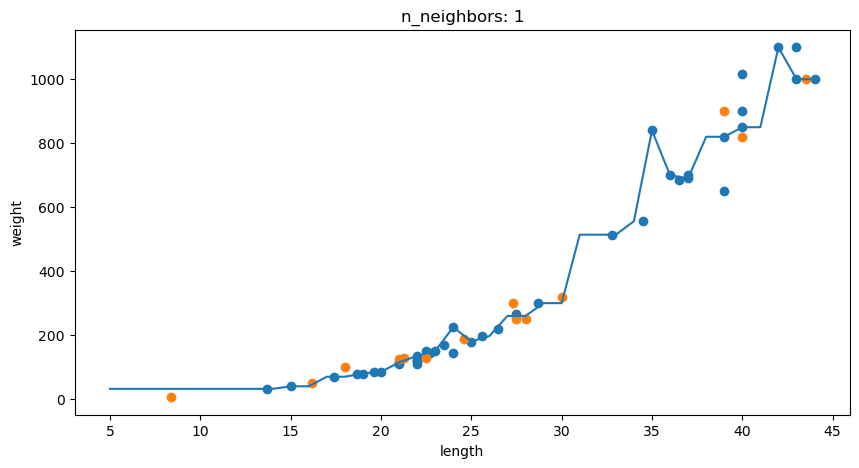

k =>  3
Train Score:  0.9804899950518966
Test Score:  0.9746459963987609
--------------------------------


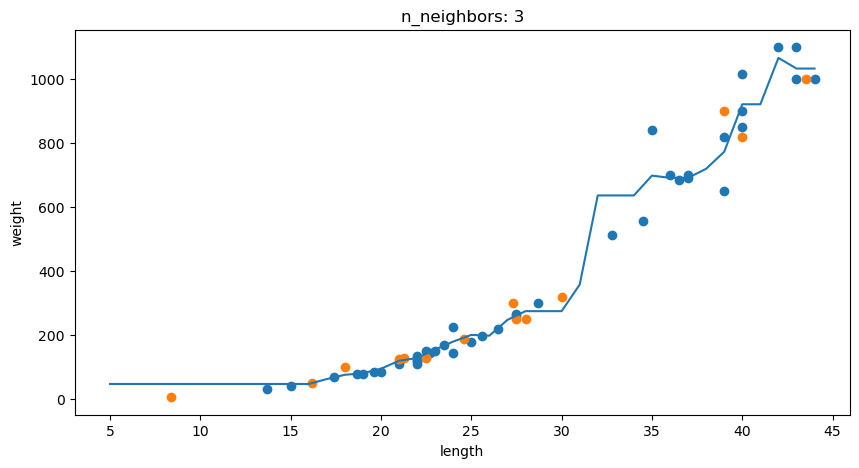

k =>  5
Train Score:  0.9698823289099254
Test Score:  0.992809406101064
--------------------------------


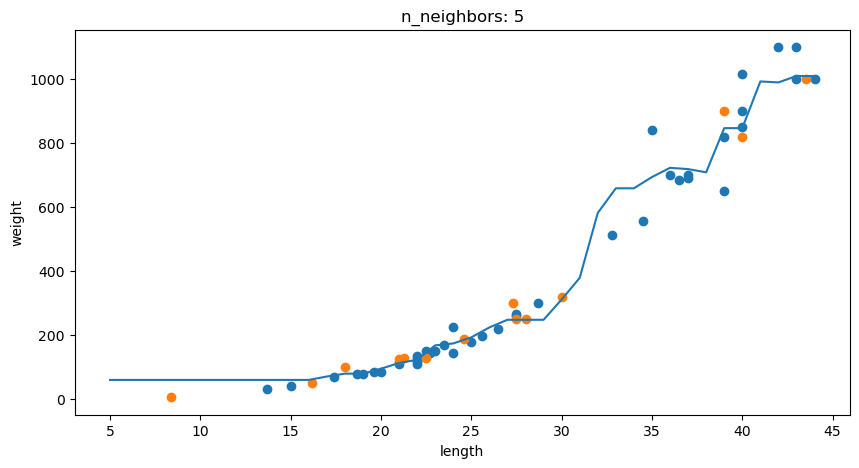

k =>  10
Train Score:  0.96164569026043
Test Score:  0.9737908255822255
--------------------------------


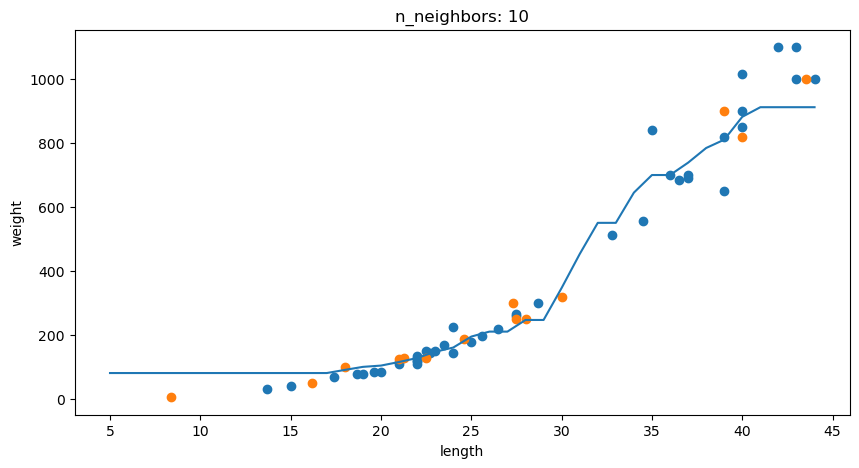

In [31]:
knr = KNeighborsRegressor()
# X좌표: 5 ~ 45
x = np.arange(5, 45).reshape(-1, 1)

# n = 1,3,5,10일 때 예측 결과를 그래프로 작성
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print('k => ', n)
    print('Train Score: ', knr.score(train_input, train_target))
    print('Test Score: ', knr.score(test_input, test_target))
    print('--------------------------------')

    # 지정한 범위 x에 대한 예측 구하기
    pred = knr.predict(x)
    
    # 훈련세트와 테스트세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, pred)
    plt.title(f'n_neighbors: {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

